In [1]:
import pandas as pd

df = pd.read_csv('/home/pedro/Desktop/class_ML/housing.data',
                 header=None,
                 sep='\s+')

df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
              'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [2]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1].values
y = df['MEDV'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

In [3]:
# import the regressor 
from sklearn.tree import DecisionTreeRegressor  
  
# create a regressor object 
regressor = DecisionTreeRegressor(random_state = 0)  
  
# fit the regressor with X and Y data 
regressor.fit(X_train, y_train) 

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [8]:
# predicting a new value 
  
# test the output by changing values, like 3750 
y_pred = regressor.predict(X_test) 

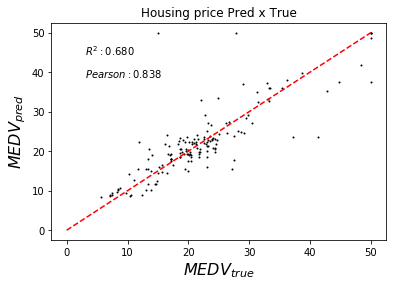

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
from scipy.stats import pearsonr



fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)
ax1.scatter(y_test[:,],y_pred[:,], s=1.0, color="black")
a=np.linspace(0,max(y_test[:,]),20)
ax1.plot(a,a,'k--',color="r")
ax1.set_xlabel('$MEDV_{true}$', fontsize=16)
ax1.set_ylabel('$MEDV_{pred}$', fontsize=16)
plt.annotate('$R^2: %.3f $ ' % r2_score(y_test[:,], y_pred[:,]), xy=(0.10, 0.85), xycoords='axes fraction')
plt.annotate('$Pearson: %.3f $ ' % pearsonr(y_test[:,], y_pred[:,])[0], xy=(0.10, 0.75), xycoords='axes fraction')
plt.title('Housing price Pred x True')
plt.show()

 1) RM                             0.598858
 2) LSTAT                          0.174985
 3) CRIM                           0.085056
 4) DIS                            0.057919
 5) PTRATIO                        0.026527
 6) AGE                            0.013986
 7) B                              0.011798
 8) NOX                            0.009834
 9) TAX                            0.009500
10) INDUS                          0.006615
11) RAD                            0.004755
12) ZN                             0.000137
13) CHAS                           0.000030


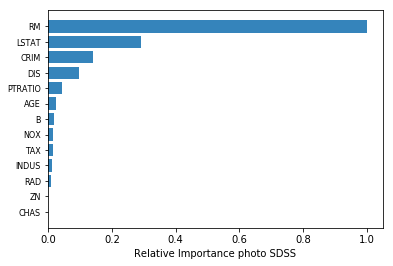

In [17]:
# Feature Importance

feature_importance = regressor.feature_importances_
feature_importance = (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos, feature_importance[sorted_idx], align='center', alpha=0.9)
feature_names = np.array(("CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"))


feat_labels = df.columns[:-1]

importances = regressor.feature_importances_

indices = np.argsort(importances)[::-1]


for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.yticks(pos, feature_names[sorted_idx])
plt.yticks(fontsize=8.0) 
plt.xlabel('Relative Importance photo SDSS')
#plt.title('Feature importance SDSS photo')
#plt.savefig('features_importance_photo_sdss.pdf', bbox_inches='tight')
plt.show()